In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/hospital_readmissions[1].csv")

In [3]:
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [4]:
 df.select_dtypes(include = 'object').nunique()

,0
age,6
medical_specialty,7
diag_1,8
diag_2,8
diag_3,8
glucose_test,3
A1Ctest,3
change,2
diabetes_med,2
readmitted,2


In [5]:
print(df.columns)

Index(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test',
       'A1Ctest', 'change', 'diabetes_med', 'readmitted'],
      dtype='object')


In [6]:
df.columns = df.columns.str.strip().str.replace('\t', '_')

/tmp/ipython-input-3342724364.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
/tmp/ipython-input-3342724364.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
/tmp/ipython-input-3342724364.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
/tmp/ipython-input-3342724364.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
/tmp/ipython-input-3342724364.py:6: UserWarning: set_ticklabels() should only be used wi

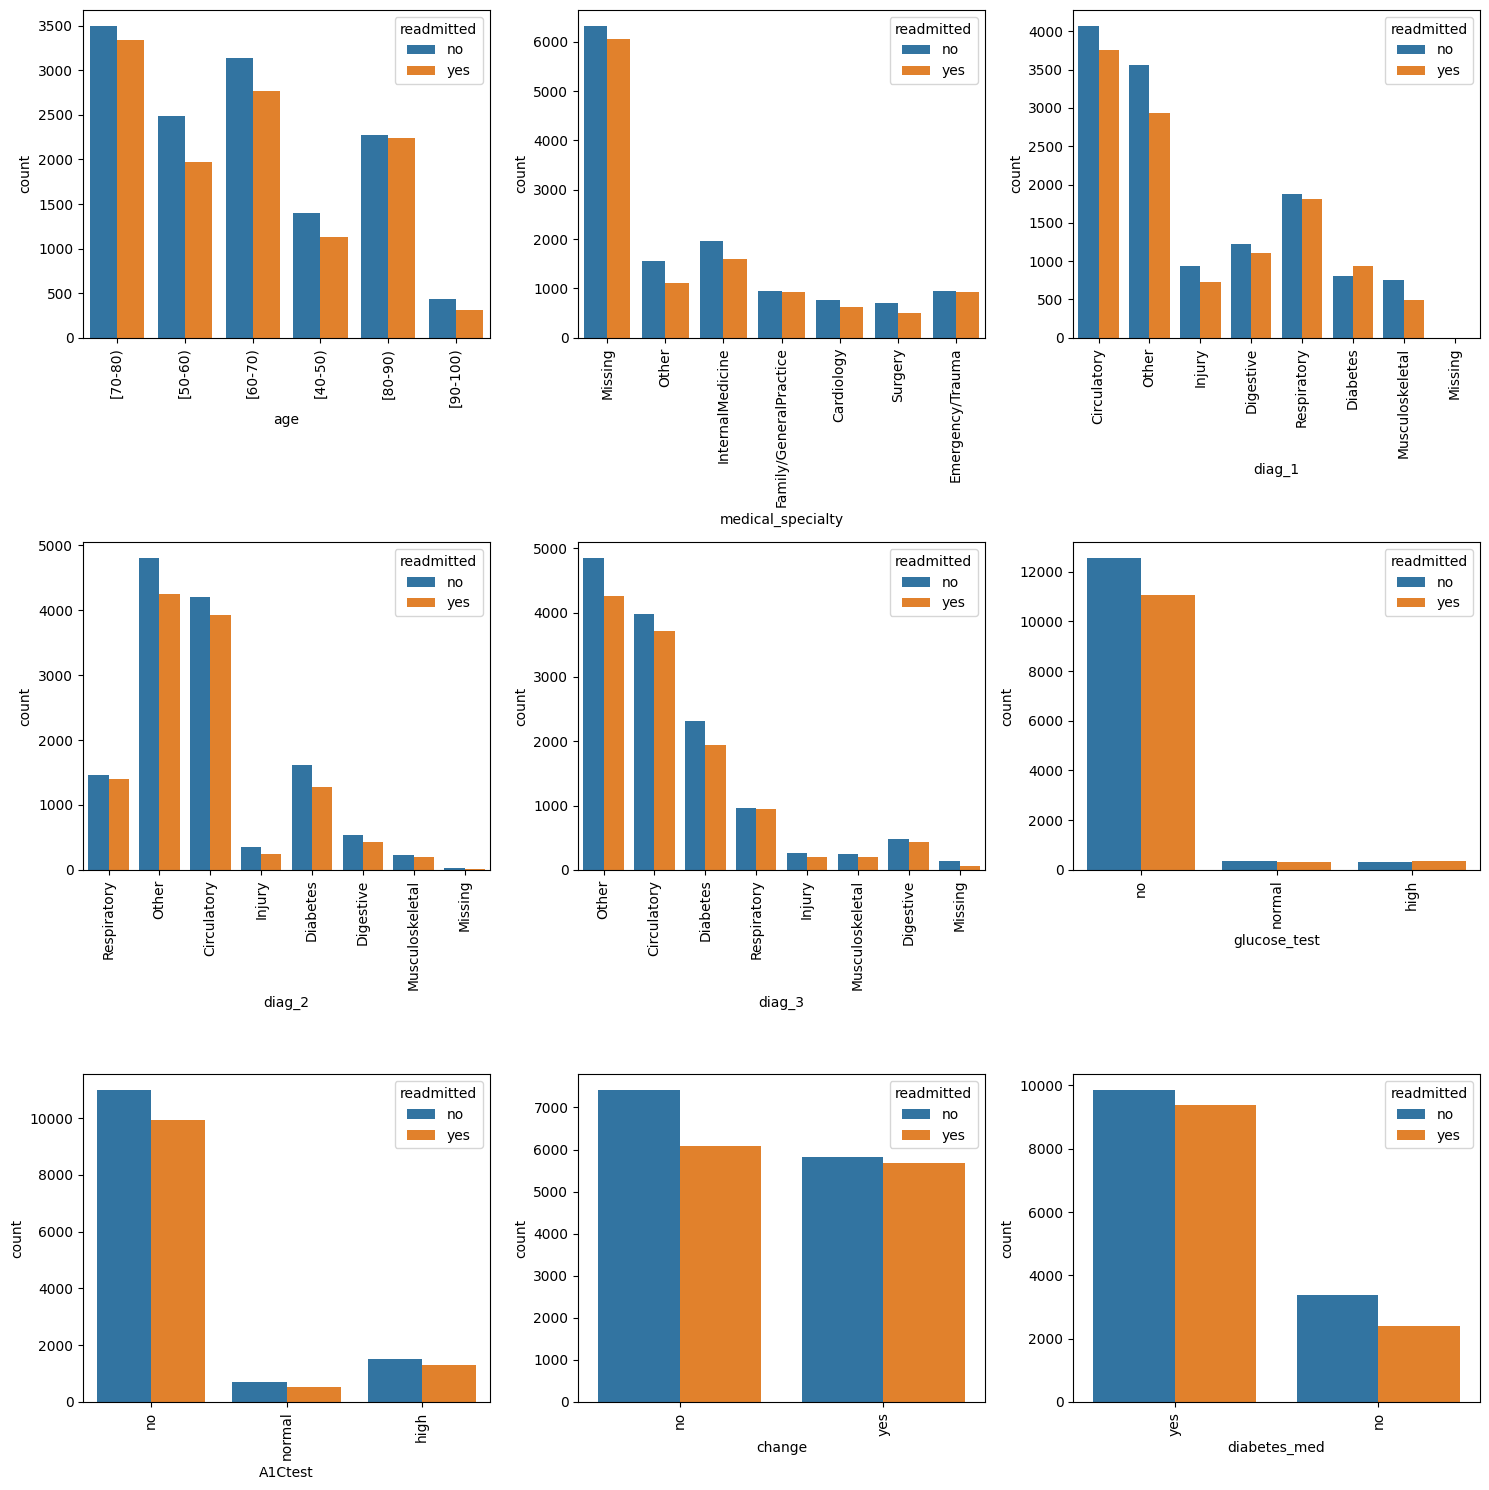

In [7]:
cat_var = ['age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test', 'A1Ctest', 'change', 'diabetes_med']
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axs = axs.flatten()
for i, var in enumerate(cat_var):
    sns.countplot(x=var, hue='readmitted', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
fig.tight_layout()
plt.show()

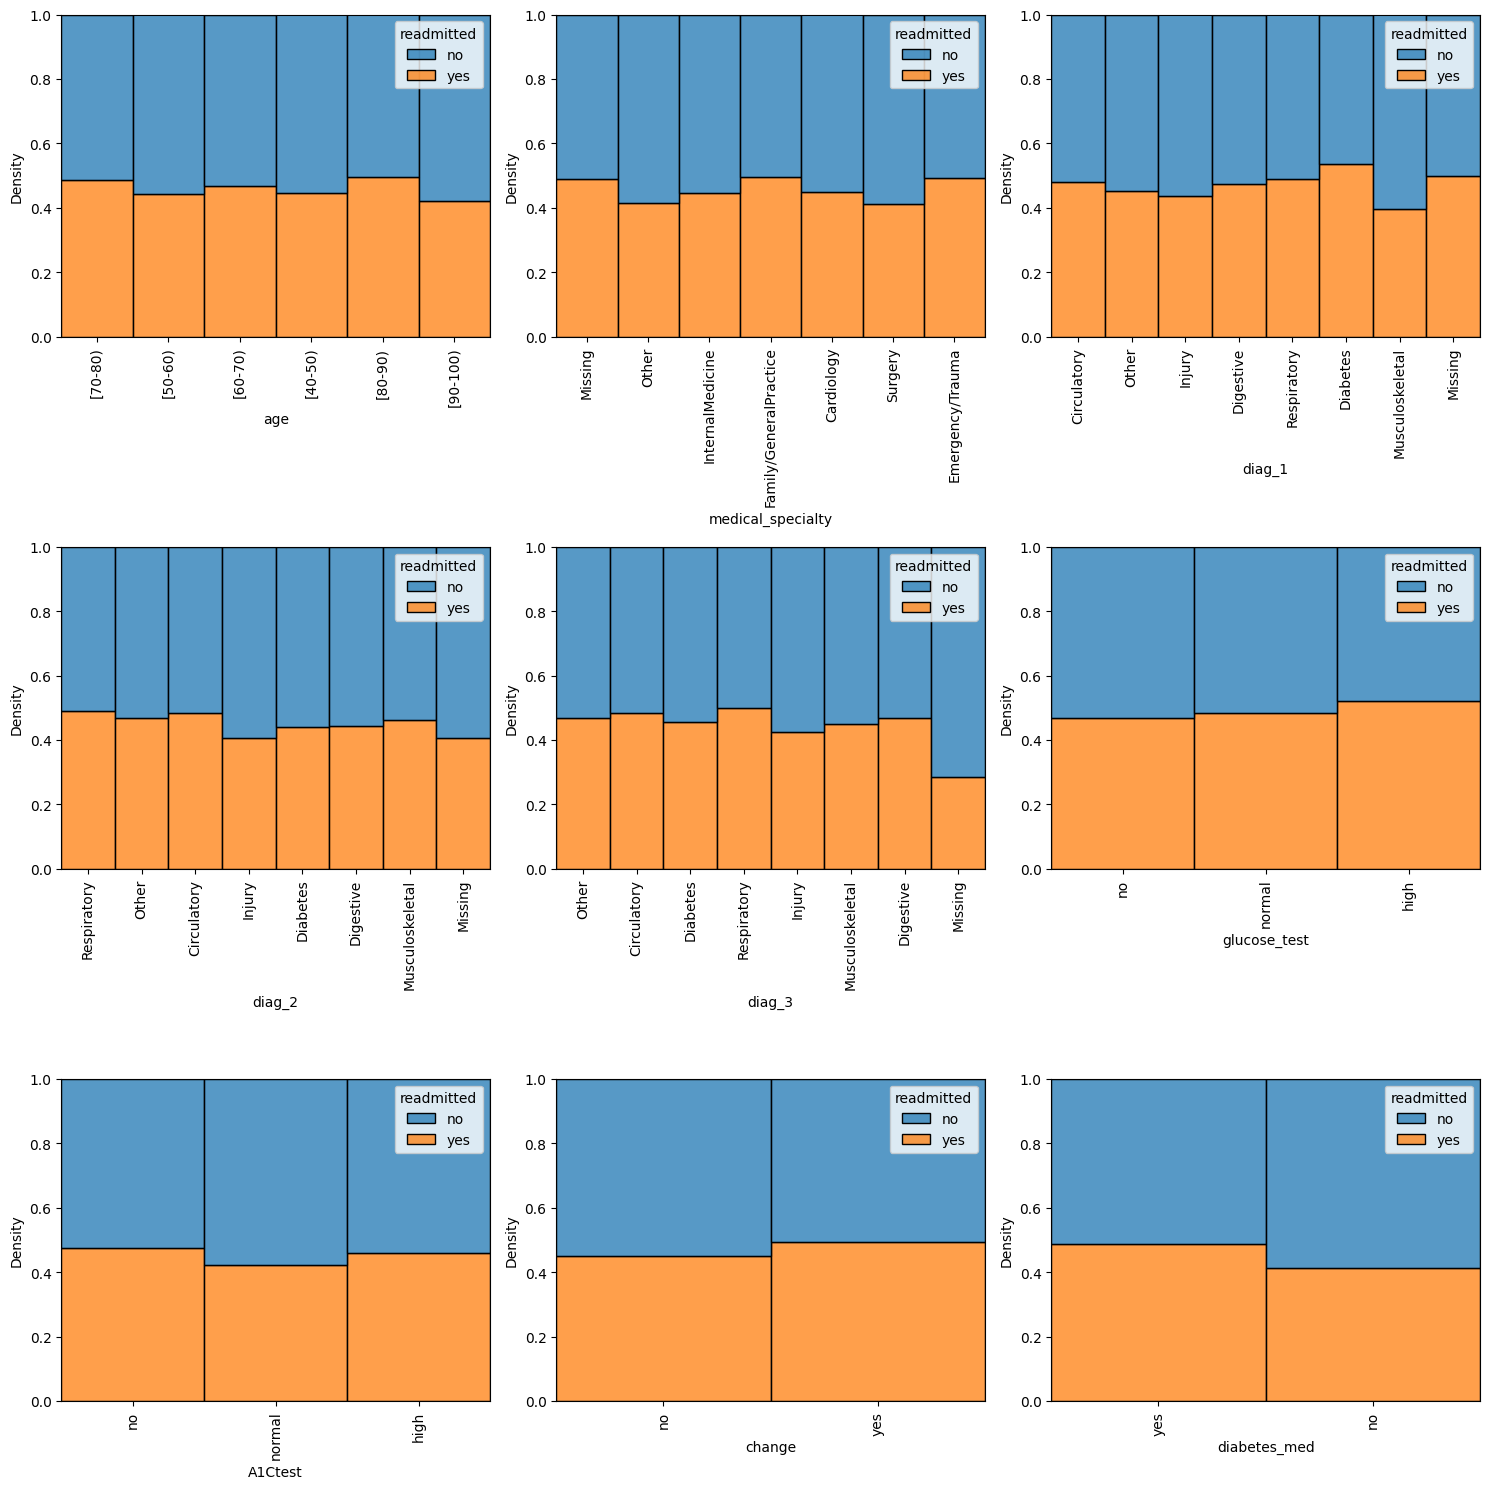

In [8]:
import warnings

warnings.filterwarnings("ignore")
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axs = axs.flatten()  # Flattening for easy iteration

# Looping through categorical variables
for i, var in enumerate(cat_var):
    sns.histplot(x=var, hue='readmitted', data=df, ax=axs[i], multiple='fill', kde=False, fill=True, element='bars', stat='density')
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)  # Rotating x-axis labels for better readability

# Adjusting layout for better visualization
fig.tight_layout()
plt.show()

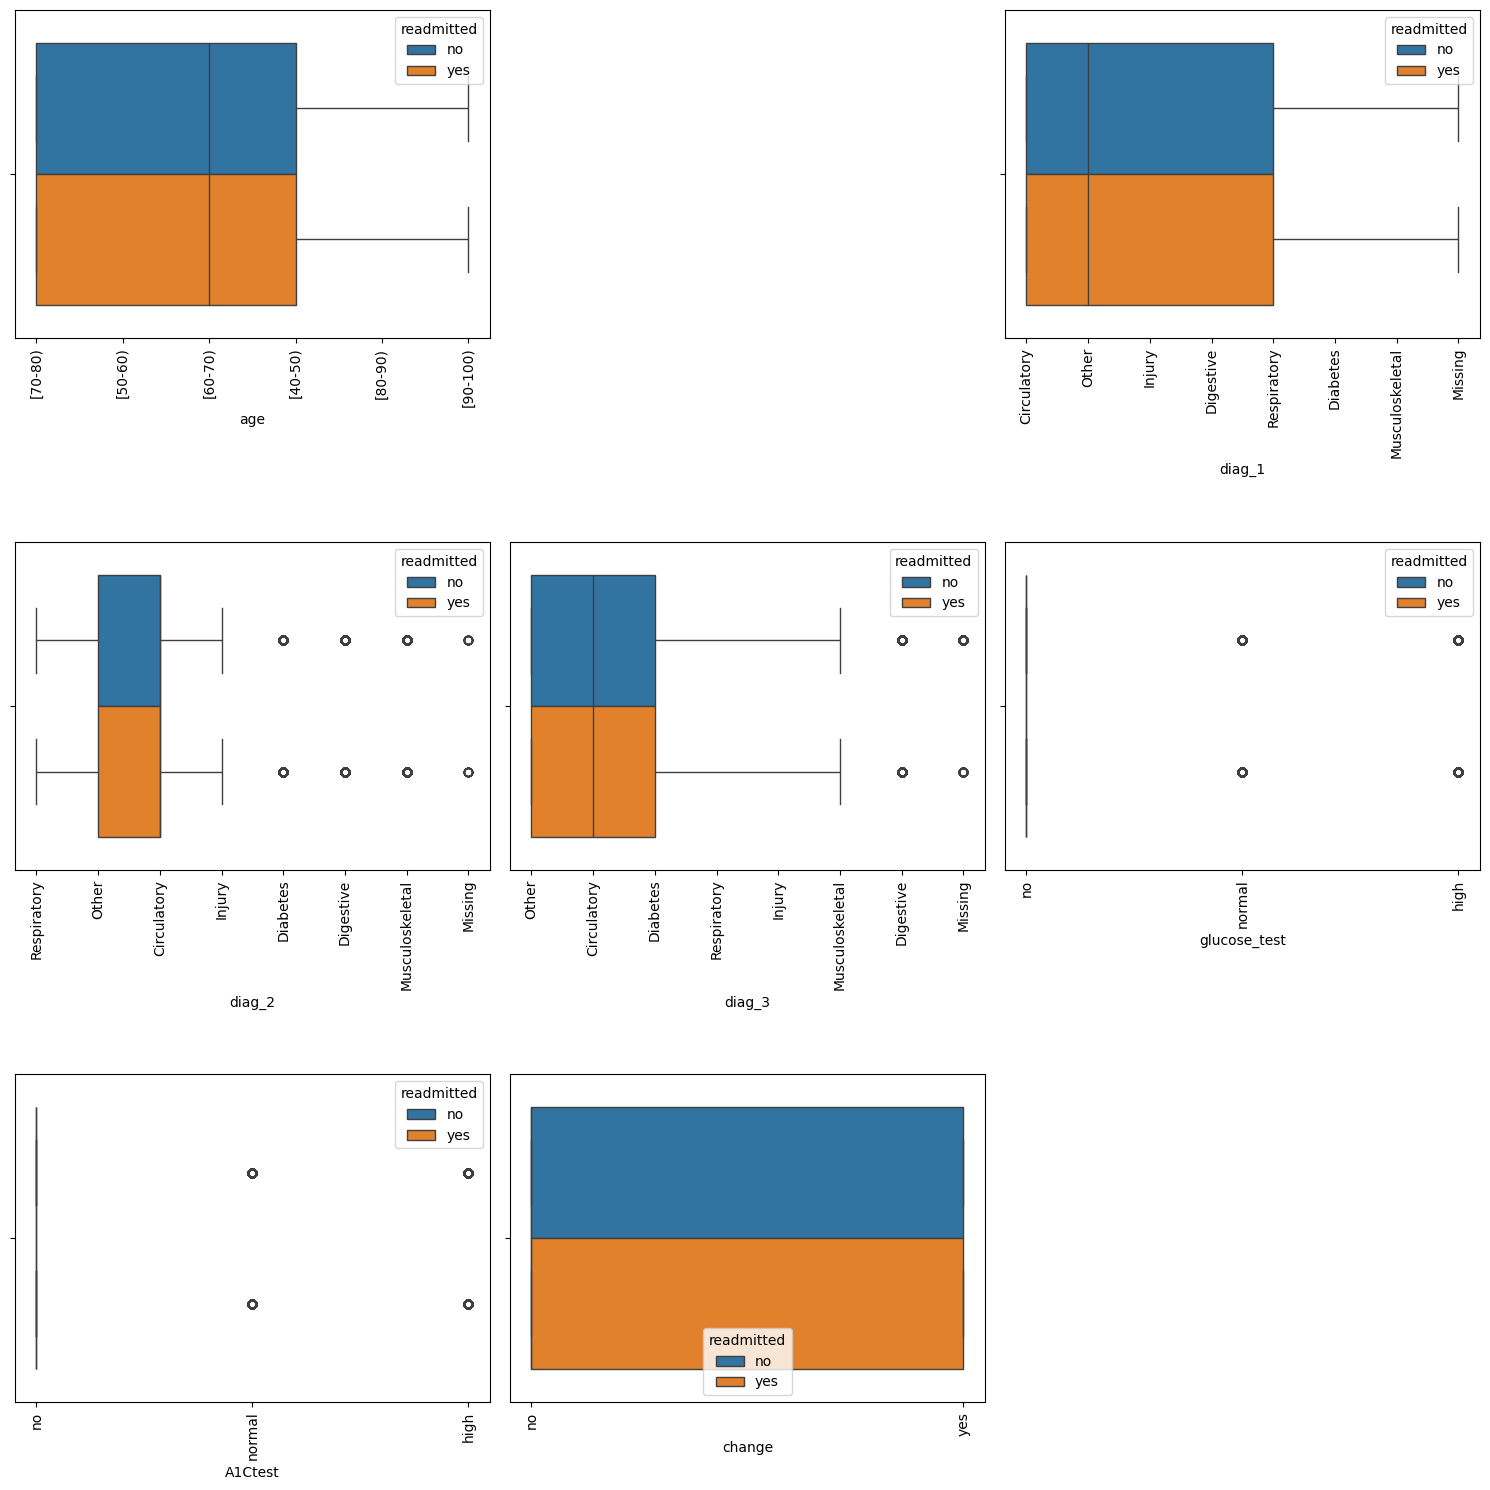

In [9]:
num_var = ['time_in_hospital','n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',]
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axs = axs.flatten()
for i, var in enumerate(cat_var):
    sns.boxplot(x=var, hue='readmitted', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
fig.tight_layout()
fig.delaxes(axs[1])
fig.delaxes(axs[8])
plt.show()

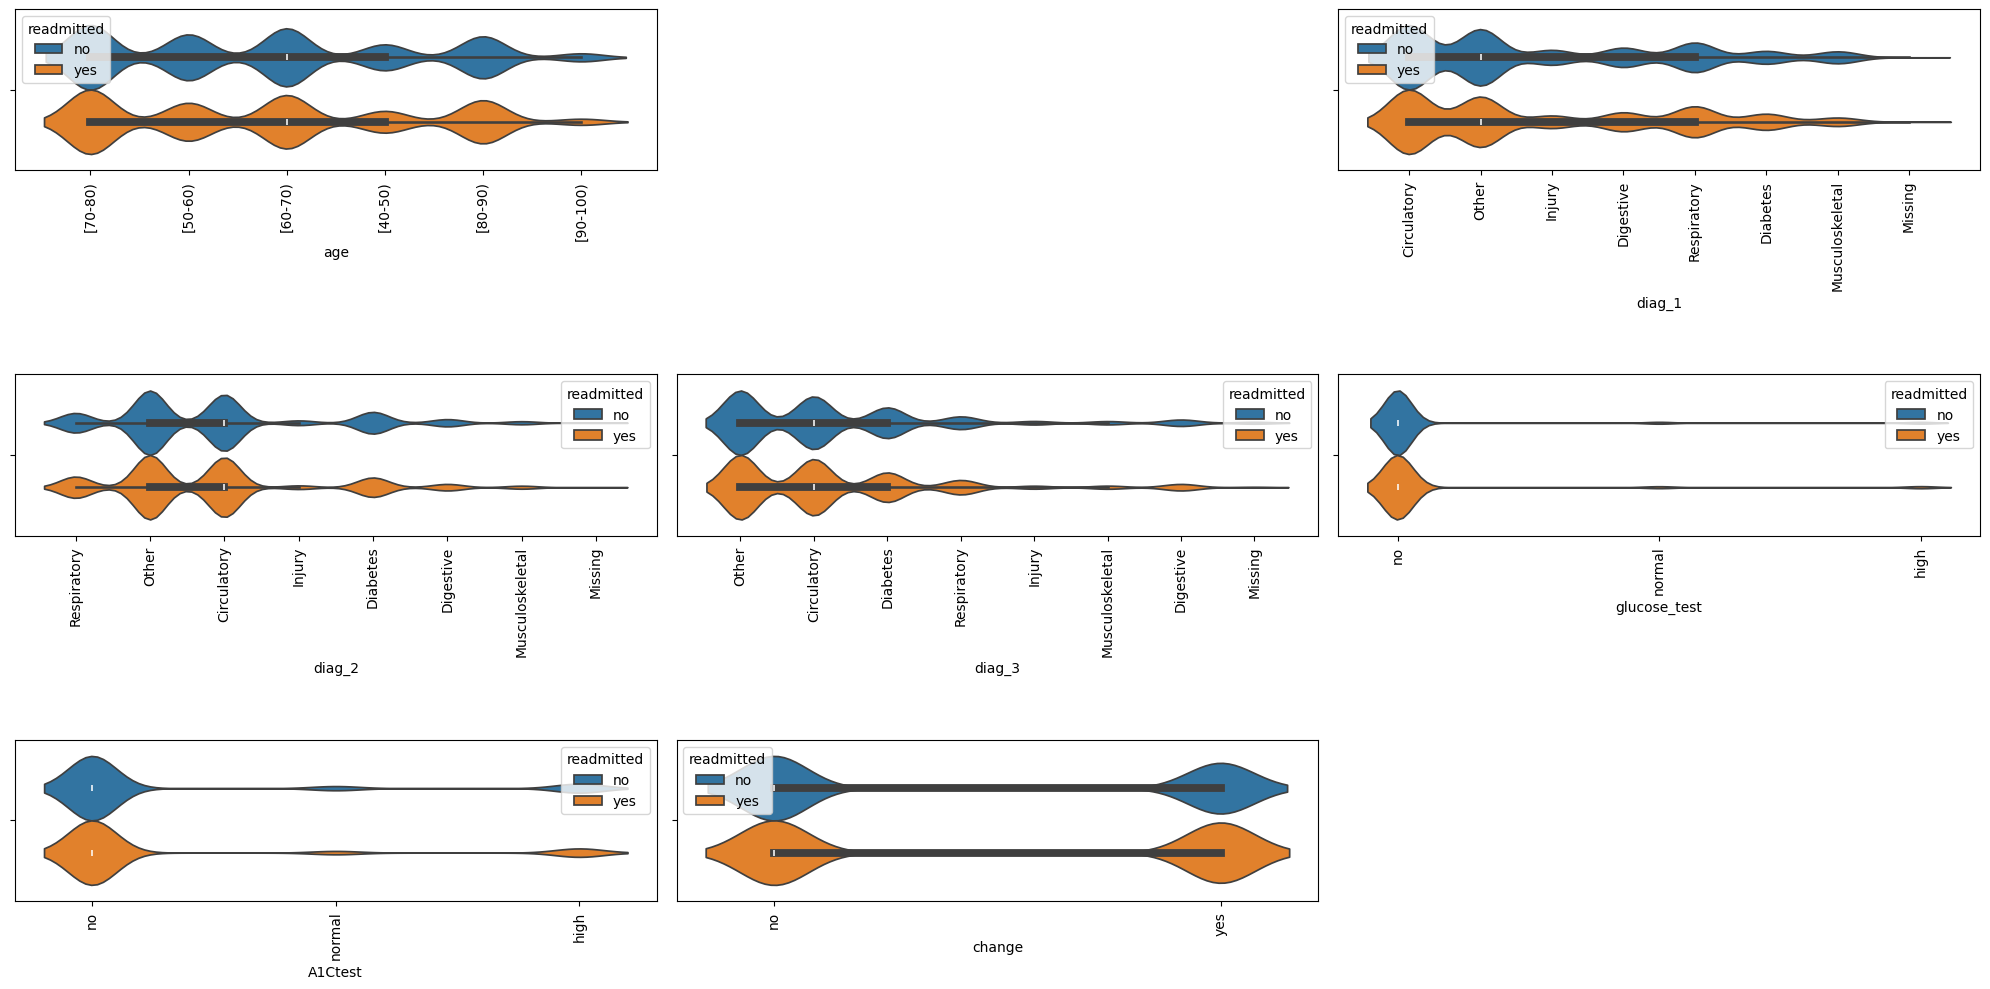

In [10]:
num_var = ['time_in_hospital','n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',]
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20,10))
axs = axs.flatten()
for i, var in enumerate(cat_var):
    sns.violinplot(x=var, hue='readmitted', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
fig.tight_layout()
fig.delaxes(axs[1])
fig.delaxes(axs[8])
plt.show()

In [13]:
check_missing=df.isnull().sum()*100/df.shape[0]
check_missing[check_missing>0].sort_values(ascending=False)

,0


In [14]:
df.shape

(25000, 17)

In [15]:
for col in df.select_dtypes(include=['object']).columns:
  print(f"{col}:{df[col].unique()}")


age:['[70-80)' '[50-60)' '[60-70)' '[40-50)' '[80-90)' '[90-100)']
medical_specialty:['Missing' 'Other' 'InternalMedicine' 'Family/GeneralPractice'
 'Cardiology' 'Surgery' 'Emergency/Trauma']
diag_1:['Circulatory' 'Other' 'Injury' 'Digestive' 'Respiratory' 'Diabetes'
 'Musculoskeletal' 'Missing']
diag_2:['Respiratory' 'Other' 'Circulatory' 'Injury' 'Diabetes' 'Digestive'
 'Musculoskeletal' 'Missing']
diag_3:['Other' 'Circulatory' 'Diabetes' 'Respiratory' 'Injury' 'Musculoskeletal'
 'Digestive' 'Missing']
glucose_test:['no' 'normal' 'high']
A1Ctest:['no' 'normal' 'high']
change:['no' 'yes']
diabetes_med:['yes' 'no']
readmitted:['no' 'yes']


In [16]:
import pickle
from sklearn.preprocessing import LabelEncoder

# Fit the LabelEncoder (this is done once, after creating df_original)
for col in df.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    label_encoder.fit(df[col].unique())
    df[col] = label_encoder.transform(df[col])
    print(f"{col}:{df[col].unique()}")

    # Save the encoder for this column
    with open(f'{col}_encoder.pkl', 'wb') as f:
        pickle.dump(label_encoder, f)

age:[3 1 2 0 4 5]
medical_specialty:[4 5 3 2 0 6 1]
diag_1:[0 6 3 2 7 1 5 4]
diag_2:[7 6 0 3 1 2 5 4]
diag_3:[6 0 1 7 3 5 2 4]
glucose_test:[1 2 0]
A1Ctest:[1 2 0]
change:[0 1]
diabetes_med:[1 0]
readmitted:[0 1]


In [17]:
def remove_outliers_iqr(df,columns):
  for col in columns:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower_limit=q1-1.5*iqr
    upper_limit=q3+1.5*iqr
    df=df[(df[col]>=lower_limit) & (df[col]<=upper_limit)]
  return df
columns_to_check=['n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency']
df_clean=remove_outliers_iqr(df,columns_to_check)
df_clean.head()


,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
1,3,3,34,2,13,0,0,0,5,6,6,6,1,1,0,1,0
2,1,5,45,0,18,0,0,0,4,0,0,0,1,1,1,1,1
4,2,1,42,0,7,0,0,0,3,6,0,7,1,1,0,1,0
5,0,2,51,0,10,0,0,0,4,6,6,6,1,1,0,0,1
6,1,4,44,2,21,0,0,0,4,3,6,6,1,2,1,1,0


In [18]:
df_clean.shape

(17629, 17)

<Axes: >

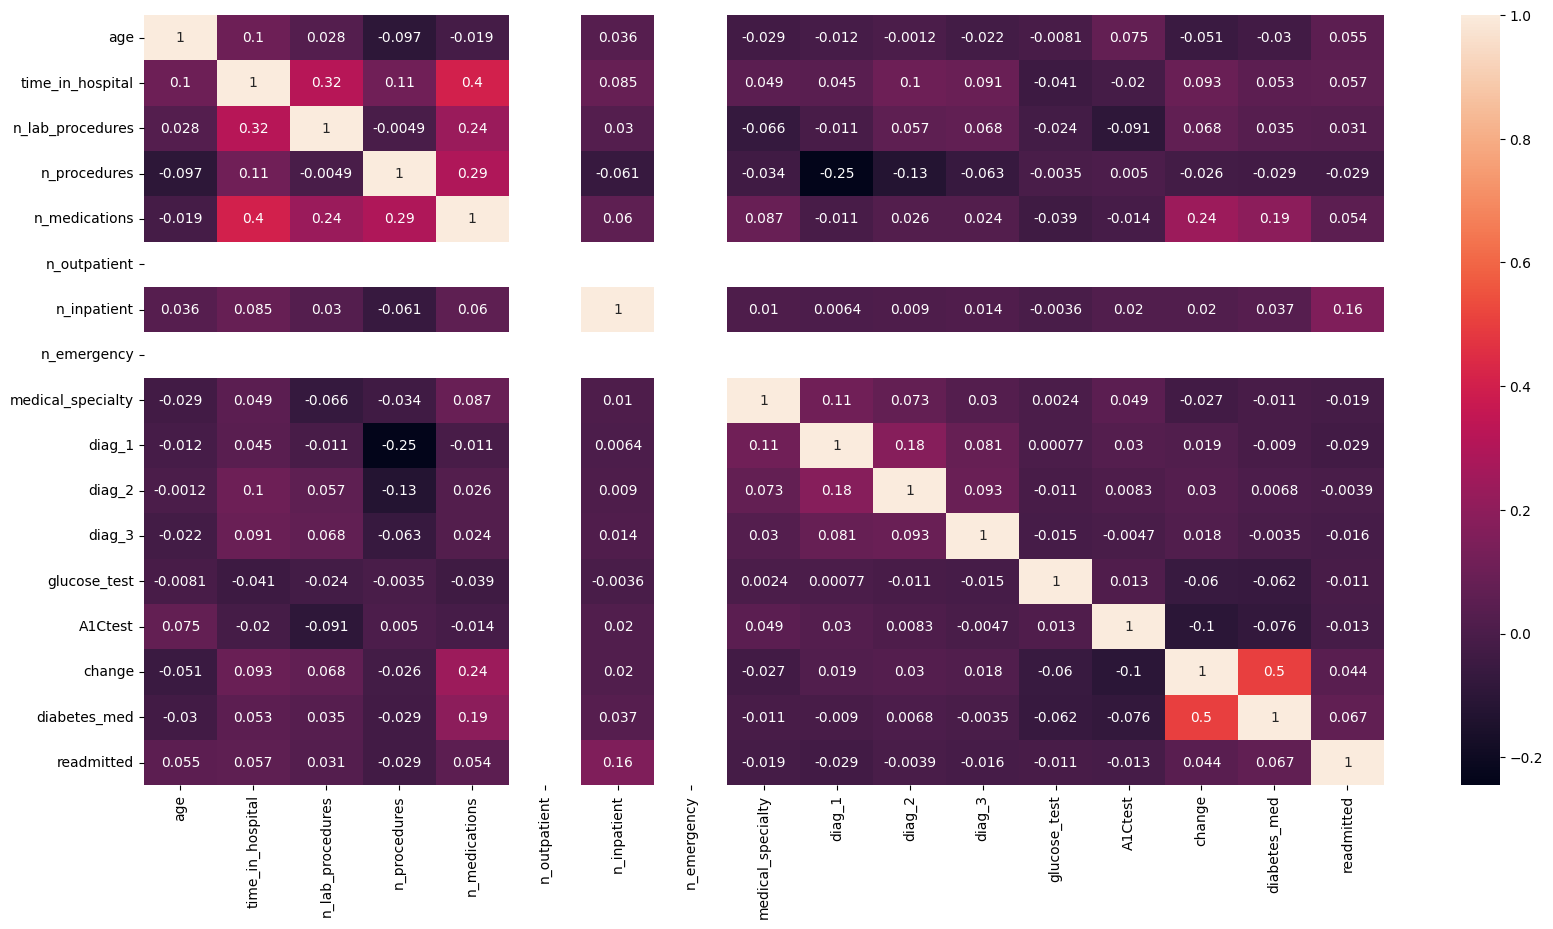

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(df_clean.corr(),annot=True)

In [20]:
x=df_clean.drop('readmitted',axis=1)
y=df_clean['readmitted']


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
DTree = DecisionTreeClassifier()
param_grid={
    'max_depth':[3,4,5,6,7,8],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[1,2,3,4],
    'random_state':[0,42]
}
grid_search=GridSearchCV(DTree,param_grid,cv=5)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}


In [23]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth=3,min_samples_leaf=1,min_samples_split=2,random_state=42)
dtree.fit(x_train,y_train)
y_pred=dtree.predict(x_test)
accuracy=(round(accuracy_score(y_test,y_pred)*100,2),"%")
print(f"Accuracy:{accuracy}")

Accuracy:(60.49, '%')


In [24]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,jaccard_score,log_loss
print('accuracy_score:',(accuracy_score(y_test,y_pred)))
print('precision_score:',(precision_score(y_test,y_pred,average='micro')))
print('recall_score:',(recall_score(y_test,y_pred,average='micro')))
print('jaccard_score:',(jaccard_score(y_test,y_pred,average='micro')))
print('log_loss:',(log_loss(y_test,y_pred)))

accuracy_score: 0.6049347702779353
precision_score: 0.6049347702779353
recall_score: 0.6049347702779353
jaccard_score: 0.4336247204716406
log_loss: 14.239594206194042


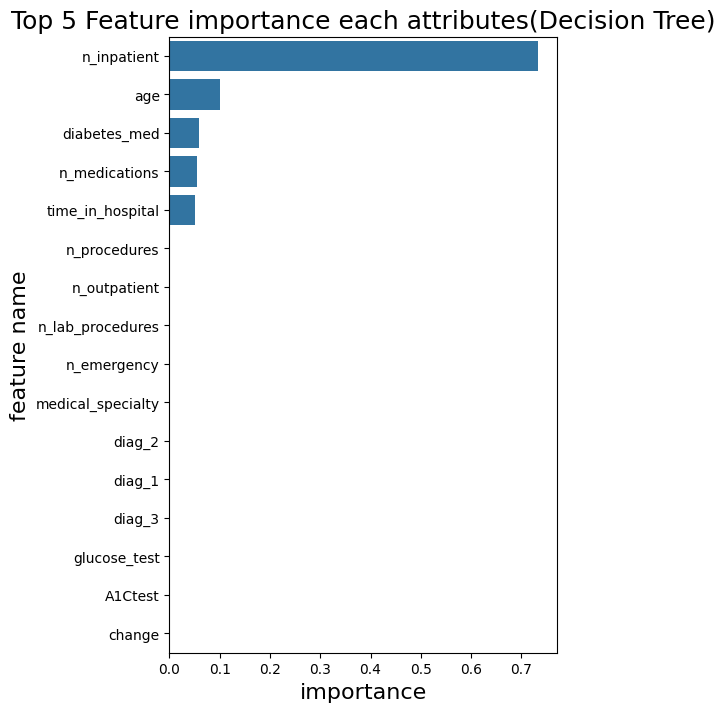

In [25]:
imp_df=pd.DataFrame({
    "feature name":x_train.columns,
    "importance":dtree.feature_importances_
    })
f1=imp_df.sort_values(by='importance',ascending=False)
f12=f1.head(25)
plt.figure(figsize=(5,8))
sns.barplot(data=f12,x='importance',y='feature name')
plt.title("Top 5 Feature importance each attributes(Decision Tree)",fontsize=18)
plt.xlabel("importance",fontsize=16)
plt.ylabel("feature name",fontsize=16)
plt.show()


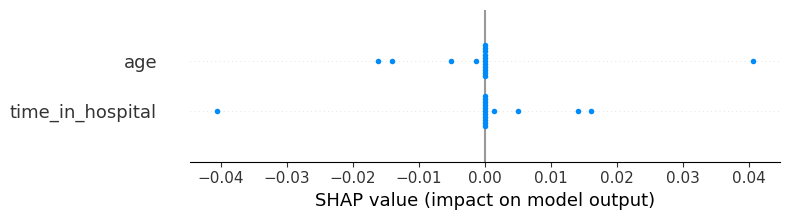

In [26]:
import shap
explainer=shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values[30],feature_names=x_test.columns)

In [27]:
print("Predictions",y_pred[:10])
print("Actual Outcomes:", y_test[:10].values)


Predictions [0 0 0 0 0 0 0 0 1 0]
Actual Outcomes: [1 1 0 1 0 0 0 0 1 1]


In [28]:
df_original = df.copy()
valid_specialties = df_original['medical_specialty'].unique()

In [29]:
def get_patient_data():
  data = {}
  for feature in x_train.columns:
    if feature in ['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency', 'glucose_test', 'A1Ctest', 'change', 'diabetes_med']:
            data[feature] = int(input(f"Enter {feature}: "))
    elif feature == 'medical_specialty':
      valid_specialties = df_original['medical_specialty'].unique()
      while True:
        specialty = input(f"Enter medical_specialty (valid options: {df_original['medical_specialty'].unique()}): ")
        if specialty in df_original['medical_specialty'].unique():
          with open('medical_specialty_encoder.pkl', 'rb') as f:
            label_encoder = pickle.load(f)
            data['medical_specialty'] = label_encoder.transform([specialty])[0]
            break
        else:
          print("Invalid medical specialty. Please choose from the list.")

  return pd.DataFrame([data])

In [30]:
sample_patient_data = {
        'age': 65,
        'medical_specialty': 9,
        'diag_1': 410,
        'diag_2': 250,
        'diag_3': 250,
        'glucose_test': 0,
        'A1Ctest': 0,
        'change': 1,
        'diabetes_med': 1,
        'time_in_hospital': 5,
        'n_lab_procedures': 50,
        'n_procedures': 2,
        'n_medications': 15,
        'n_outpatient': 1,
        'n_inpatient': 0,
        'n_emergency': 0
    }

In [31]:
import pandas as pd
sample_patient_df = pd.DataFrame([sample_patient_data])

In [32]:
import pandas as pd
import pickle

def predict_readmission_user_input(model, x_train_columns):

    data = {}
    for feature in x_train_columns:
        if feature in ['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
                       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
                       'glucose_test', 'A1Ctest', 'change', 'diabetes_med']:
            while True:
                try:
                    data[feature] = int(input(f"Enter {feature}: "))
                    break
                except ValueError:
                    print("Invalid input. Please enter an integer.")
        elif feature == 'medical_specialty':
            with open('medical_specialty_encoder.pkl', 'rb') as f:
                label_encoder = pickle.load(f)
            valid_specialties = label_encoder.classes_
            while True:
                specialty = input(f"Enter medical_specialty (valid options: {valid_specialties}): ")
                try:
                    data[feature] = label_encoder.transform([specialty])[0]
                    break
                except ValueError:
                    print("Invalid medical specialty. Please choose from the list.")
        # Add similar input handling for other categorical features if needed
    data['diag_1'] = int(input("Enter diag_1: "))
    data['diag_2'] = int(input("Enter diag_2: "))
    data['diag_3'] = int(input("Enter diag_3: "))

    patient_df = pd.DataFrame([data])
    patient_df = patient_df[x_train_columns]  # Ensure correct column order
    prediction = model.predict(patient_df)[0]
    if prediction == 1:
        return "Readmitted"
    else:
        return "Not Readmitted"

# Example usage:
prediction_result = predict_readmission_user_input(dtree, x_train.columns)
print(f"Prediction: {prediction_result}")

Enter age: 65
Enter time_in_hospital: 5
Enter n_lab_procedures: 40
Enter n_procedures: 2
Enter n_medications: 10
Enter n_outpatient: 0
Enter n_inpatient: 0
Enter n_emergency: 0
Enter medical_specialty (valid options: ['Cardiology' 'Emergency/Trauma' 'Family/GeneralPractice'
 'InternalMedicine' 'Missing' 'Other' 'Surgery']): Surgery
Enter glucose_test: 0
Enter A1Ctest: 0
Enter change: 0
Enter diabetes_med: 1
Enter diag_1: 310
Enter diag_2: 332
Enter diag_3: 540
Prediction: Not Readmitted
